# PREPROCESSING

## Setup

In [1]:
import os
import sys
from pathlib import Path

In [2]:
# Detect Colab if present
try:
    from google.colab import drive
    COLAB = True
    print("Note: Using Google CoLab")
except:
    print("Note: Not using Google CoLab")
    COLAB = False

if COLAB:
    if not os.path.ismount("/content/drive"):
        print("Note: Mounting drive")
        drive.mount('/content/drive')
    else:
        print("Note: Drive already mounted")

    os.system("pip install pycm")
    print("Note: pycm installed")

    sys.path.append("/content/drive/MyDrive/tumorclass.info")
    sys.path.append("/content/drive/MyDrive/tumorclass.info/notebooks")

    PROJECT_PATH = "/content/drive/MyDrive/tumorclass.info"

else:
    PROJECT_PATH = str(Path.cwd().parent)

DATA_PATH = os.path.join(PROJECT_PATH, "data/")
MODELS_PATH = os.path.join(PROJECT_PATH, "models/")
DATASET_PATH = os.path.join(PROJECT_PATH, "data/dataset/")
SRC_0_PATH = os.path.join(PROJECT_PATH, "data/dataset/src_0/")
SRC_1_PATH = os.path.join(PROJECT_PATH, "data/dataset/src_1/")
SRC_2_PATH = os.path.join(PROJECT_PATH, "data/dataset/src_2/")
TRAIN_PATH = os.path.join(PROJECT_PATH, "data/dataset/train/")
TRAIN_NORMAL_PATH = os.path.join(PROJECT_PATH, "data/dataset/train/normal/")
TRAIN_LGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/train/lgg/")
TRAIN_HGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/train/hgg/")
TEST_PATH = os.path.join(PROJECT_PATH, "data/dataset/test/")
TEST_NORMAL_PATH = os.path.join(PROJECT_PATH, "data/dataset/test/normal/")
TEST_LGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/test/lgg/")
TEST_HGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/test/hgg/")
VALID_PATH = os.path.join(PROJECT_PATH, "data/dataset/valid/")
VALID_NORMAL_PATH = os.path.join(PROJECT_PATH, "data/dataset/valid/normal/")
VALID_LGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/valid/lgg/")
VALID_HGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/valid/hgg/")
AUG_TRAIN_PATH = os.path.join(PROJECT_PATH, "data/dataset/aug_train/")
AUG_TRAIN_NORMAL_PATH = os.path.join(
    PROJECT_PATH, "data/dataset/aug_train/normal/"
)
AUG_TRAIN_LGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/aug_train/lgg/")
AUG_TRAIN_HGG_PATH = os.path.join(PROJECT_PATH, "data/dataset/aug_train/hgg/")

Note: Not using Google CoLab


In [3]:
import shutil
import zipfile
from pathlib import Path
from time import sleep

from IPython.display import Image, display
from keras.preprocessing.image import ImageDataGenerator
from tools.data import augment_data
from tools.file import (
    mkdir_if_not_exists,
    move_files,
    p_join,
    rename_path_files,
)
from tools.visualize import visualize_generator

In [4]:
if not os.path.exists(DATASET_PATH):
    with zipfile.ZipFile(p_join(DATA_PATH, "dataset.zip"), 'r') as zip_ref:
        zip_ref.extractall(DATASET_PATH)

# Delete DS_Store files
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file == ".DS_Store":
            os.remove(p_join(root, file))

In [5]:
test_file_num = 20
validation_split = 0.3

mkdir_if_not_exists(
    TRAIN_NORMAL_PATH,
    TRAIN_LGG_PATH,
    TRAIN_HGG_PATH,
    VALID_NORMAL_PATH,
    VALID_LGG_PATH,
    VALID_HGG_PATH,
    TEST_NORMAL_PATH,
    TEST_LGG_PATH,
    TEST_HGG_PATH,
)


if (
    os.path.exists(SRC_0_PATH)
    and os.path.exists(SRC_1_PATH)
    and os.path.exists(SRC_2_PATH)
):
    move_files(
        input_path=SRC_0_PATH,
        output_path=TEST_NORMAL_PATH,
        num_files=test_file_num,
        randomize=True,
    )
    move_files(
        input_path=SRC_1_PATH,
        output_path=TEST_LGG_PATH,
        num_files=test_file_num,
        randomize=True,
    )
    move_files(
        input_path=SRC_2_PATH,
        output_path=TEST_HGG_PATH,
        num_files=test_file_num,
        randomize=True,
    )

    move_files(
        input_path=SRC_0_PATH,
        output_path=[TRAIN_NORMAL_PATH, VALID_NORMAL_PATH],
        split=validation_split,
    )
    move_files(
        input_path=SRC_1_PATH,
        output_path=[TRAIN_LGG_PATH, VALID_LGG_PATH],
        split=validation_split,
    )
    move_files(
        input_path=SRC_2_PATH,
        output_path=[TRAIN_HGG_PATH, VALID_HGG_PATH],
        split=validation_split,
    )

# sleep for 1 second to make sure that the files are moved
sleep(2)

# delete directories ["src_0", "src_1", "src_2"] in DATASET_PATH
for dir in [SRC_0_PATH, SRC_1_PATH, SRC_2_PATH]:
    shutil.rmtree(p_join(PROJECT_PATH, dir))

rename_path_files(TRAIN_NORMAL_PATH, TRAIN_LGG_PATH, TRAIN_HGG_PATH)
rename_path_files(VALID_NORMAL_PATH, VALID_LGG_PATH, VALID_HGG_PATH)
rename_path_files(TEST_NORMAL_PATH, TEST_LGG_PATH, TEST_HGG_PATH)

In [6]:
TRAIN_NORMAL_FILES = os.listdir(TRAIN_NORMAL_PATH)
TRAIN_LGG_FILES = os.listdir(TRAIN_LGG_PATH)
TRAIN_HGG_FILES = os.listdir(TRAIN_HGG_PATH)

VALID_NORMAL_FILES = os.listdir(VALID_NORMAL_PATH)
VALID_LGG_FILES = os.listdir(VALID_LGG_PATH)
VALID_HGG_FILES = os.listdir(VALID_HGG_PATH)

TEST_NORMAL_FILES = os.listdir(TEST_NORMAL_PATH)
TEST_LGG_FILES = os.listdir(TEST_LGG_PATH)
TEST_HGG_FILES = os.listdir(TEST_HGG_PATH)

print(f"TRAIN_NORMAL_FILES: {len(TRAIN_NORMAL_FILES)}")
print(f"TRAIN_LGG_FILES: {len(TRAIN_LGG_FILES)}")
print(f"TRAIN_HGG_FILES: {len(TRAIN_HGG_FILES)}")

print(f"VALID_NORMAL_FILES: {len(VALID_NORMAL_FILES)}")
print(f"VALID_LGG_FILES: {len(VALID_LGG_FILES)}")
print(f"VALID_HGG_FILES: {len(VALID_HGG_FILES)}")

print(f"TEST_NORMAL_FILES: {len(TEST_NORMAL_FILES)}")
print(f"TEST_LGG_FILES: {len(TEST_LGG_FILES)}")
print(f"TEST_HGG_FILES: {len(TEST_HGG_FILES)}")

TRAIN_NORMAL_FILES: 103
TRAIN_LGG_FILES: 186
TRAIN_HGG_FILES: 182
VALID_NORMAL_FILES: 45
VALID_LGG_FILES: 81
VALID_HGG_FILES: 78
TEST_NORMAL_FILES: 20
TEST_LGG_FILES: 20
TEST_HGG_FILES: 20


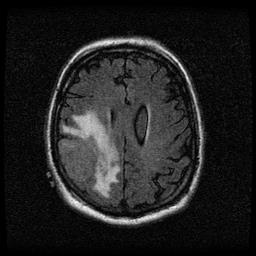

In [7]:
image = p_join(TRAIN_HGG_PATH, TRAIN_HGG_FILES[0])
Image(filename=image)

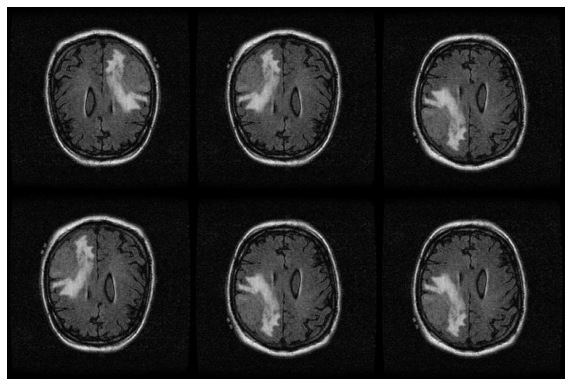

In [8]:
visualize_generator(
    image,
    ImageDataGenerator(horizontal_flip=True, vertical_flip=True),
    img_n=6,
    nrows=2,
    ncols=3,
)

In [9]:
gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=.05,
    height_shift_range=.05,
    shear_range=10,
    zoom_range=.1,
    # # channel_shift_range=10,
    horizontal_flip=True,
    # vertical_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode="nearest",
    # rescale="1./255",
)

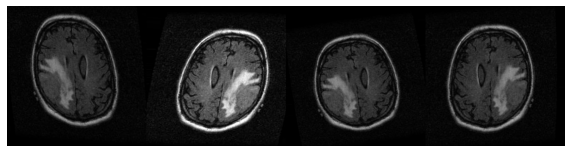

In [10]:
visualize_generator(image, gen, img_n=4, nrows=1, ncols=4)

In [11]:
display(len(TRAIN_NORMAL_FILES) * (2 + 1))
display(len(TRAIN_LGG_FILES) * (1 + 1))
display(len(TRAIN_HGG_FILES) * (1 + 1))

309

372

364

In [12]:
# Augment Normal
augment_data(
    path=TRAIN_NORMAL_PATH,
    files=TRAIN_NORMAL_FILES,
    out_path=AUG_TRAIN_NORMAL_PATH,
    label="Normal",
    gen=gen,
    file_type="jpg",
    aug_num=2,
)

In [13]:
# Augment LGG
augment_data(
    path=TRAIN_LGG_PATH,
    files=TRAIN_LGG_FILES,
    out_path=AUG_TRAIN_LGG_PATH,
    label="LGG",
    gen=gen,
    file_type="jpg",
    aug_num=1,
)

In [14]:
# Augment HGG
augment_data(
    path=TRAIN_HGG_PATH,
    files=TRAIN_HGG_FILES,
    out_path=AUG_TRAIN_HGG_PATH,
    label="HGG",
    gen=gen,
    file_type="jpg",
    aug_num=1,
)

In [15]:
AUG_TRAIN_NORMAL_FILES = os.listdir(AUG_TRAIN_NORMAL_PATH)
AUG_TRAIN_LGG_FILES = os.listdir(AUG_TRAIN_LGG_PATH)
AUG_TRAIN_HGG_FILES = os.listdir(AUG_TRAIN_HGG_PATH)
print(len(AUG_TRAIN_NORMAL_FILES))
print(len(AUG_TRAIN_LGG_FILES))
print(len(AUG_TRAIN_HGG_FILES))

309
372
364


In [ ]:
# # make DataFrame with augmented data. columns are: filename, label. label is 0 for normal, 1 for lgg, 2 for hgg
# df = pd.DataFrame(
#     {
#         "filename": AUG_FILES_0 + AUG_FILES_1 + AUG_FILES_2,
#         "label": [0] * len(AUG_FILES_0) + [1] * len(AUG_FILES_1) + [2] * len(AUG_FILES_2),
#     }
# )

In [ ]:
# # write df to csv
# df.to_csv(path_or_buf=DATASET_FOLDER + "augmented_data.csv", index=False)